# {How Crime Incidents in Cincinnati Vary Over Time and Across Different Neighborhoods?}📝

![Banner](./assets/banner.jpeg)

## Checkpoint 1

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 How do crime incidents in Cincinnati vary over time and across different neighborhoods? The problem I am trying to address is the impact of police response times and on crime rates in Cincinnati. One reason why many parents may worry about putting their kids for University of Cincinnati as the surrounding areas are high in crime rates and can be very dangerous. By evaluating these datasets and API, it can help local law enforcement and community stakeholders analyze the effectiveness of police operations and how resources are being allocated. With the Cincinnati Police Data Initiative dataset, we can identify trends that reveal how different types of crimes have a relationship with varied response times on different neighborhoods and time periods. For example, if longer response times are consistently involved with increased crime rates, this can highlight the areas that need additional officers or resources etc. to improve community safety. This project is meant to uncover patterns that can guide our law enforcement to make more efficient policing strategies and contribute to the overall safety and well-being of Cincinnati's residents, including UC students!!!


## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 With this project, I am seeking to answer the specific question: How do police response times correlate with different types of crime rates in Cincinnati. What suggestions does this relationship have for resource allocation and community safety? 

By exploring this question, I want to find out if longer response times lead to higher crime rates, identify which neighborhoods/areas are most affected, and assess the effectiveness of our current policing strategies. Also I want to understand if certain types of crimes have faster response rates or vice verse, and thus this could educate targeted civilians and cause some policy adjustments. Overall this analysis will help guide decisions on how to optimize police resources and enhance public safety and build more community trust in our law enforcement.

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 My hypothesized answer is that longer police response times are related with higher crime rates in Cincinnati. I expect to discover that areas with longer response times experience a greater number of violent crimes, like assault and robbery, compared to property crimes. And these may be less influenced by immediate and more quick police presence. Also, I believe that certain neighborhoods, particularly those with fewer police resources, will show more inequalities in crime rates related to response times. This analysis may expose that quick responses are imperative in preventing crimes and/or addressing ongoing incidents effectively. In conclusion, the findings could indicate a need for reallocating police resources to enhance response procedures in areas with high-crime.

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 5 data sources in total

Datasets (4): 
https://data.cincinnati-oh.gov/safety/PDI-Police-Data-Initiative-Police-Calls-for-Servic/gexm-h6bt/about_data
https://data.cincinnati-oh.gov/safety/PDI-Police-Data-Initiative-Crime-Incidents/k59e-2pvf/about_data
https://data.cincinnati-oh.gov/safety/CPD-Reported-Shootings/sfea-4ksu/about_data
https://data.cincinnati-oh.gov/Safety/PDI-Police-Data-Initiative-Use-of-Force/8us8-wi2w/about_data

API (1):
https://dev.socrata.com/foundry/data.cincinnati-oh.gov/k59e-2pvf

I am going to relate these data sources by connecting the Police Calls for Service and Crime Incidents dataset by utilizing the shared timestamps and locations. This will allow us to examine how response times for different types of calls, like violent or property crimes, relate to the frequency and outcomes of incidents in the same areas.

By linking crime types from the Crime Incidents dataset with their corresponding calls for service, we can analyze how response times differ depending on the severity or nature of the crime. This will provide valuable insights into the relationship between response times and crime rates.

Also via using the geographical information from both datasets, we can conduct a neighborhood-level analysis. This will help us explore how response times and crime rates vary across different areas and assess whether these differences contribute to higher crime rates in specific neighborhoods or influence the effectiveness of police response strategies.


## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 My approach to answering my project question is a systematic one. I will being by starting with data preparation and analysis. That means I will clean both the Police Calls for Service and Crime Incidents datasets, to make sure fields like timestamps and location data etc are all consistent. Then move onto handling any missing or irrelevant data so it will mess up later on in the project. Next, I will merge the two datasets by matching incidents based on time and location. This will allow me to link calls for service with the corresponding crime events. When I am calculating response times for each call it will help determine the time difference between when the call was made and when the officers actually arrived on the scene. Moving on, we will analyze how response times vary for the different types of crime like violent and property crimes. Then we can use those findings to investigate patterns in how severe they were. It can also help us assess whether delays in certain areas are contributing to crime patterns or affecting police effectiveness. Then finally I will use statistical methods to explore the relationship between response times and crime outcomes more closer, like through regression modeling for instance.

In [ ]:
import pandas as pd
import requests

#accessing API for Crime Incidents data
api_url = 'https://data.cincinnati-oh.gov/resource/k59e-2pvf.json'
headers = {'Accept': 'application/json'}  #requesting JSON response
response = requests.get(api_url, headers=headers)

#check if the API call was successful
if response.status_code == 200:
    api_data = pd.DataFrame(response.json())  #load the data into a df
    print(f"API Data Loaded: {len(api_data)} records.")  #check number of records loaded
else:
    print(f"API request failed with status code: {response.status_code}")


In [ ]:
import pandas as pd

#load the Police Calls for Service dataset
calls_data = pd.read_csv(r'C:\Users\chari\Documents\Data Tech Analytics\PDI__Police_Data_Initiative__Police_Calls_for_Service.csv', low_memory=False)

#display the first five rows of the dataset
print("Police Calls for Service Data (First 5 Rows):")
print(calls_data.head())


In [ ]:
import pandas as pd

#load the Crime Incidents dataset
crime_incidents_url = 'https://data.cincinnati-oh.gov/api/views/k59e-2pvf/rows.csv?accessType=DOWNLOAD'

#display the first five rows of the dataset
print("Crime Incidents Data (First 5 Rows):")
print(crime_incidents_url.head())

## Checkpoint 2: Exploratory Data Analysis (EDA) & Visualization



- Produce statistical summaries of the data.
- Analyze data distributions of the data.
- Analyze the correlations between the data features.
- Identify data issues.
- Identify data types that need to be converted/transformed.
- Provide a detailed write-up on every item above.

In [60]:
def analyze_dataframe(df, name):
    #summary of the dataframe
    print(f"Summary of {name}:")
    print(df.info())
    print("\n")

    #statistics for the dataframe
    print(f"Statistics for {name}:")
    print(df.describe())
    print("\n")

    #number of duplicate records
    duplicate_count = df.duplicated().sum()
    print(f"Number of duplicate records in {name}: {duplicate_count}")
    
    #drop the duplicate records
    df.drop_duplicates(inplace=True)
    print(f"Duplicate records dropped from {name}.")
    print("\n")

    #check for missing values
    missing_values_count = df.isna().sum()
    print(f"Missing values in {name}:\n{missing_values_count}")
    print("\n")

#list of datasets
datasets = [data, shootings_data, use_of_force_data, calls_data]
dataset_names = ['API Data', 'Shootings Data', 'Use of Force Data', 'Calls Data']

#analyze each dataset
for i in range(len(datasets)):
    analyze_dataframe(datasets[i], dataset_names[i])


Summary of API Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   instanceid                      1000 non-null   object        
 1   incident_no                     1000 non-null   object        
 2   date_reported                   1000 non-null   datetime64[ns]
 3   date_from                       1000 non-null   object        
 4   date_to                         1000 non-null   object        
 5   clsd                            994 non-null    object        
 6   ucr                             990 non-null    object        
 7   dst                             1000 non-null   object        
 8   beat                            999 non-null    object        
 9   offense                         990 non-null    object        
 10  location                        1000 non-null   obje

The police incidents dataset gives us many summaries, espeically the hour_from column because it has a mean of 741 and shows significant variability meaning there is a wide range of incident times. As for the correlation analysis it is limited since there is only one numeric feature, but we can use teh categorical relationships like "offense" against hour_from to get some trends too. There is a high percentage of missing values that I want to point out; for example: victim_ethnicity and totalnumbervictims which does affect the overall analysis. Additionally there are many data types that require conversion. Some columns like longitude_x and latitude_x should be numeric but they are not, and the dates for "date_reported" should be in datetime format to be easier to work with. 

The shootings dataset has 1,490 entries, and it provides important summaries for columns like LATITUDE_X, LONGITUDE_X, and Age, with the averages for each roughly being 39.14 (lat), -84.52 (long), and 29.59 (age). When I look at the data distributions, it seems that age has a normal distribution but lattitude and longitude have some outliers. This leads me to think it would be interesting to analyze how age relates to other demographic factors like race and this data set. But this might be difficult to do since they are categorical variables. To note a few data issues, there are some missing values in columns like lattitude and sna neighborhood, but I did not find any duplicates which is good for keeping the data clean. Then for data types, I believe that the DateTimeOccurred column should be converted to a datetime format to make it easier to analyze dates and times.

The Use of Force dataset contains 21,818 entries and like the rest also posesseses various columns, including "INCIDENT_NO" and "INCIDENT_DATE." The stats show a mean latitude of about 39.13 and a mean longitude of approximately -84.52 so this give us the exact points and location context of the incidents we work with in the data set. A downside I saw right away were that there are a lot of missing values, especially in lattitude and longitude.There is over 9000 entries missing for thos two columns and this could definitely affect spatial analysis. Other missing values in the categorical columns are for instance SUBJECT_GENDER and OFFICER_GENDER. But the good thing is there are no duplicate records. I noted that for data types I had to change, the INCIDENT_DATE column needs to be converted from object to datetime for better analysis.

The Calls dataset has the most data records is what I noticed, specifically with a massive 5,626,155 entries. Some key columns being CREATE_TIME_INCIDENT and DISPOSITION_TEXT. The data has a variety of types like datetime for incident creation time and float for priority levels which I thought was unique from the others greatly. Though, the missing values in this set are significant since it is so big, like in columns PRIORITY_COLOR and SNA_NEIGHBORHOOD, where over 2 million entries are missing. This could affect my analysis related to response times and neighborhood impacts if I choose to stick with that still. The bright side is that there are no duplicate records to worry about in addition. The latitude and longitude columns show valid float values but there are still a lot of missing data points in these coordinates. To improve the dataset's accuracy, I will strongly consider filling in missing values where possible and making sure all datetime columns are correctly formatted.

## Data Visualizations

loaded 1000 records from api


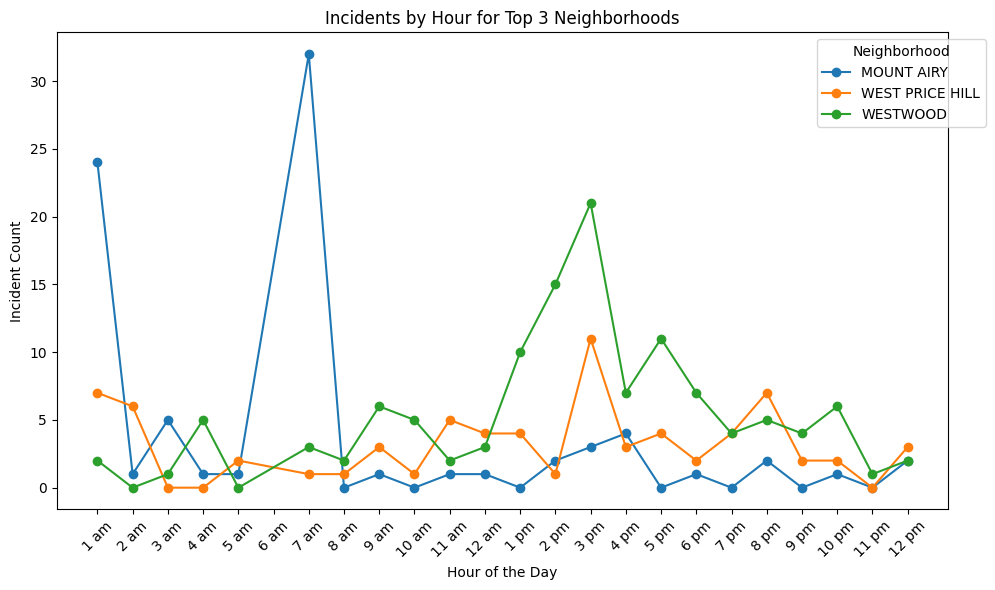

In [ ]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

#api url for crime incidents data
api_url = 'https://data.cincinnati-oh.gov/resource/k59e-2pvf.json'

#make api request
response = requests.get(api_url)

#check if request worked
if response.status_code == 200:
    #load data into dataframe
    data = pd.DataFrame(response.json())
    print(f"loaded {len(data)} records from api")

    #check if date_reported column is there and convert to datetime
    if 'date_reported' in data.columns:
        data['date_reported'] = pd.to_datetime(data['date_reported'], errors='coerce')
        data['incident_hour'] = data['date_reported'].dt.hour

        #get top 3 neighborhoods by incidents
        top_neigh = data['cpd_neighborhood'].value_counts().head(3).index
        filtered_data = data[data['cpd_neighborhood'].isin(top_neigh)]

        #count incidents by hour and neighborhood
        hourly_incidents = filtered_data.groupby(['incident_hour', 'cpd_neighborhood']).size().unstack(fill_value=0)

        #plot line chart
        plt.figure(figsize=(10, 6))  # set figure size
        for neigh in hourly_incidents.columns:  # plot each neighborhood
            plt.plot(hourly_incidents.index, hourly_incidents[neigh], marker='o', label=neigh)

        plt.title('Incidents by Hour for Top 3 Neighborhoods')  # title of the graph
        plt.xlabel('Hour of the Day')  # x-axis label
        plt.ylabel('Incident Count')  # y-axis label

        #change x-ticks for am and pm for better time reading
        plt.xticks(range(24), [f"{(i % 12) + 1} {'am' if i < 12 else 'pm'}" for i in range(24)], rotation=45)

        plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1))
        plt.tight_layout()
        plt.show()

The graph above illustrates the relationship between incident counts and the time of day. I chose to use a line chart for this data because it effectively displays numerous points across each hour to me, allowing the highest counts of incidents to stand out clearly. The graph indicates that different neighborhoods experience their peak incident times at various hours. For instance, Mount Airy shows higher incident counts at night, particularly at 1 AM and 6 AM, while Westwood has more incidents in the afternoon, peaking around 3 PM. The neighborhoods with the highest counts are Mount Airy, Westwood, and West Price Hill with each displaying patterns in their incident occurrences throughout the day that are also valuable to look into.

C:\Users\chari\AppData\Local\Temp\ipykernel_25200\4151311028.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shootings_2024['DateOccurred'] = pd.to_datetime(shootings_2024['DateOccurred'], format='%Y%m%d')
C:\Users\chari\AppData\Local\Temp\ipykernel_25200\4151311028.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shootings_2024['Month'] = shootings_2024['DateOccurred'].dt.month_name()


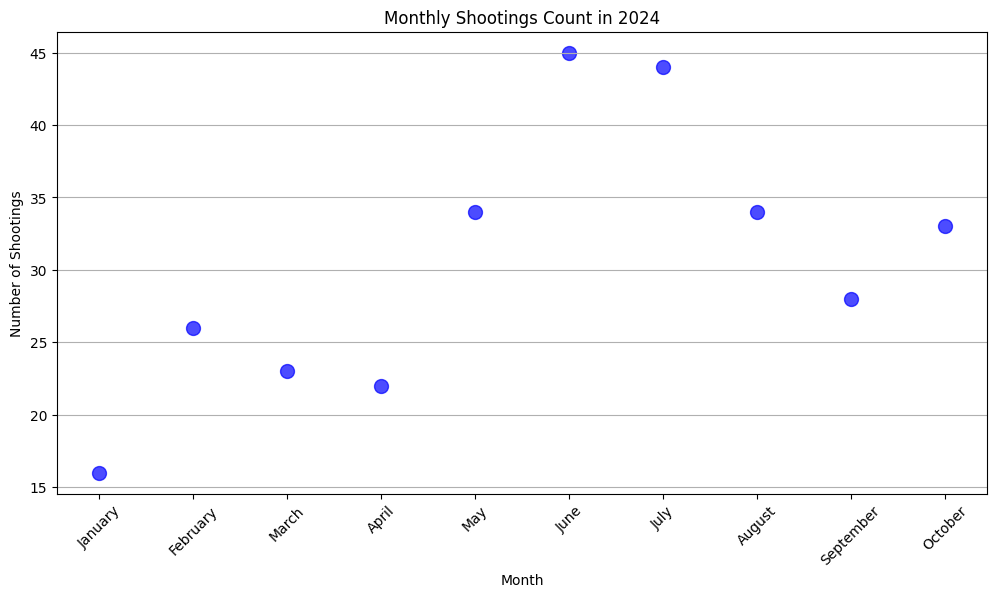

In [148]:
import pandas as pd
import matplotlib.pyplot as plt

#load the excel file
file_path = r'C:\Users\chari\Documents\Data Tech Analytics\CPD_Reported_Shootings_20241026.csv'  
shootings_data = pd.read_csv(file_path)

#filter for just the year 2024
shootings_2024 = shootings_data[shootings_data['YearOccurred'] == 2024]

#convert the date column to datetime
shootings_2024['DateOccurred'] = pd.to_datetime(shootings_2024['DateOccurred'], format='%Y%m%d')

#add a column for month names
shootings_2024['Month'] = shootings_2024['DateOccurred'].dt.month_name()

#count shootings per month
monthly_counts_2024 = shootings_2024['Month'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
])

#set up data for scatter plot
months = monthly_counts_2024.index
counts = monthly_counts_2024.values

#scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(months, counts, color='blue', alpha=0.7, s=100)  # s is point size
plt.title('Monthly Shootings Count in 2024')
plt.xlabel('Month')
plt.ylabel('Number of Shootings')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

The graph shows the number of shootings across each month of the year. I chose a scatter plot for this data because it allows us to easily spot the months with the highest shooting counts and keeping it seperate from each months. The data suggests that shootings peak in the middle of the year, with June and July showing over 40 incidents. I feel this might be due to warmer weather, as more people are outside and interacting with each other. But in contrast, the earlier and colder months like February and March have the fewest shootings likely because people spend less time outside and inside more isolated etc.

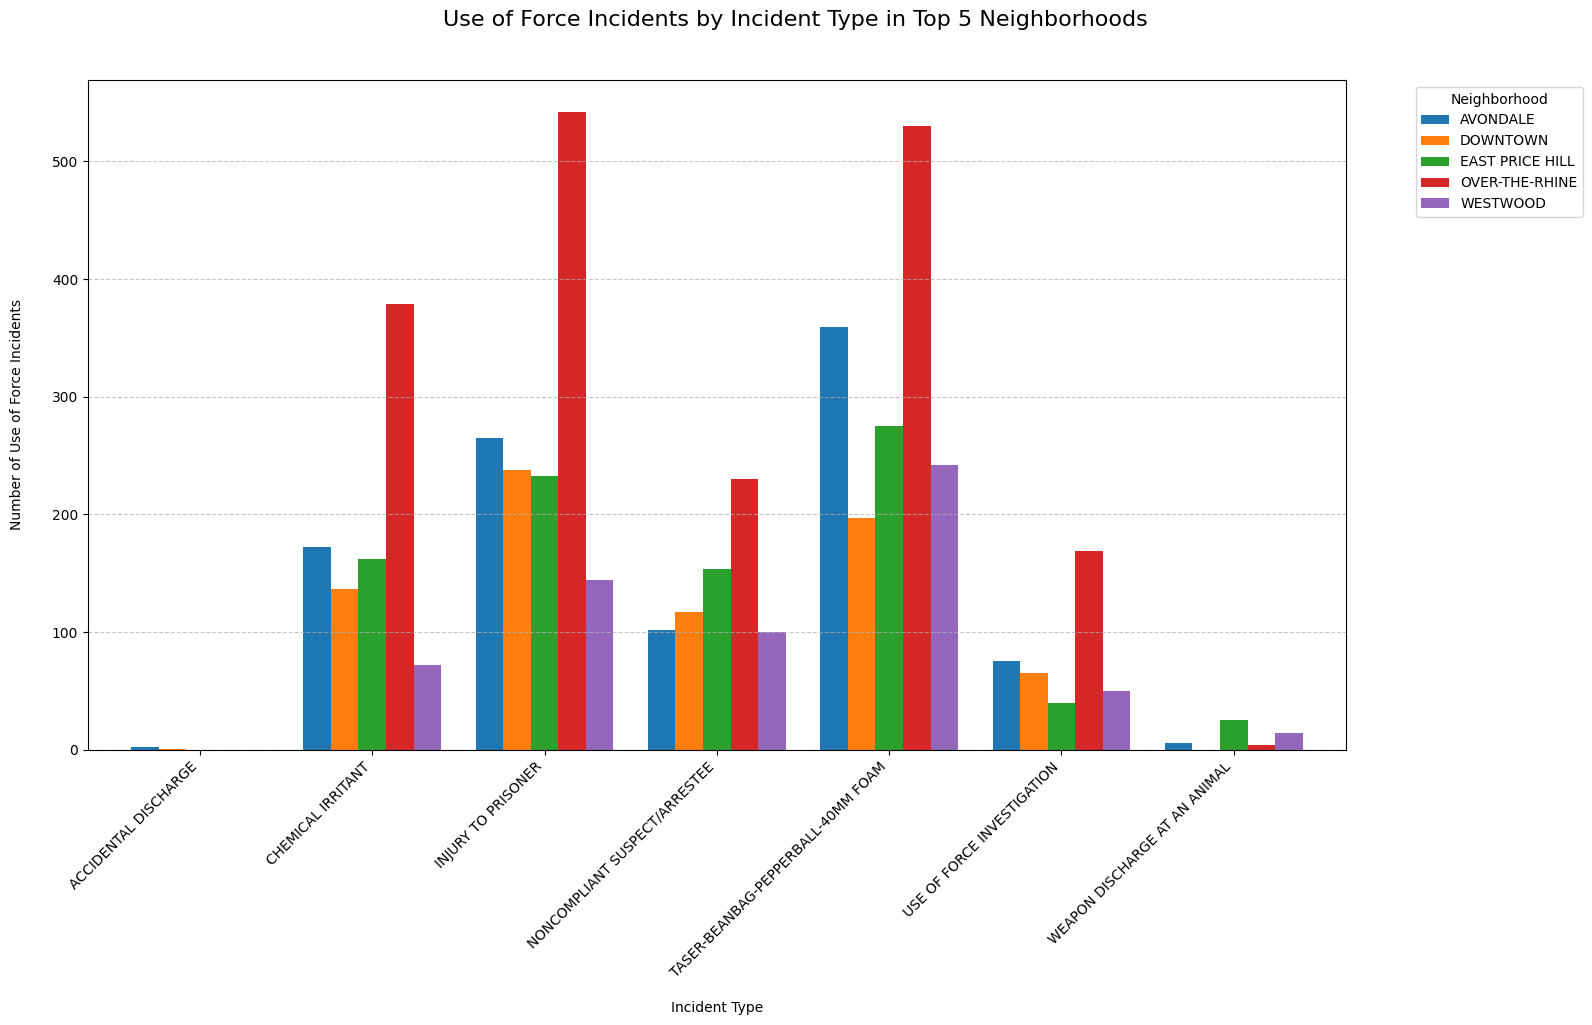

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#load the police use of force excel
use_of_force_path = r'C:\Users\chari\Documents\Data Tech Analytics\PDI__Police_Data_Initiative__Use_of_Force_20241026.csv'

#read the dataset
use_of_force_data = pd.read_csv(use_of_force_path)

#filter for the top 5 neighborhoods with the most incidents
top_5_neighborhoods = use_of_force_data['SNA_NEIGHBORHOOD'].value_counts().nlargest(5).index
top_incidents = use_of_force_data[use_of_force_data['SNA_NEIGHBORHOOD'].isin(top_5_neighborhoods)]

#count # of use of force incidents by incident type and neighborhood
incident_counts = top_incidents.groupby(['INCIDENT_DESCRIPTION', 'SNA_NEIGHBORHOOD']).size().unstack(fill_value=0)

#clustered bar chart
fig, ax = plt.subplots(figsize=(16, 10))
incident_counts.plot(kind='bar', width=0.8, ax=ax)

#padding needed to add for better look 
plt.suptitle('Use of Force Incidents by Incident Type in Top 5 Neighborhoods', y=1.02, fontsize=16)  #main title with padding
ax.set_xlabel('Incident Type', labelpad=15)  #add padding to x-axis label
ax.set_ylabel('Number of Use of Force Incidents', labelpad=20)  #add padding to y-axis label
plt.xticks(rotation=45, ha='right')

#put legend outside
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')

#add extra padding around plot
plt.subplots_adjust(top=0.85, right=0.85, left=0.1, bottom=0.15)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


This graph shows the types of use of force incidents in the top five neighborhoods, highlighting how often each type occurs within these areas in Cincinnati. The most common incidents appear to be "injury to prisoner" and the use of force methods like tasers or beanbags (not sure what that even means honestly), especially in the neighborhoods of Over-the-Rhine (OTR) and Avondale. While I don't have a clear reason for Avondale's rates, I do know very well that OTR has many bars, so that makes sense for alcohol-related incidents to contribute to higher use of force. I chose a clustered bar chart to clearly represent the frequency of these incidents across neighborhoods, making it easy to compare multiple incident types without losing context on neighborhood-specific differences.

In [56]:
import pandas as pd
import plotly.express as px

#load excel file
calls_file_path = r'C:\Users\chari\Documents\Data Tech Analytics\PDI__Police_Data_Initiative__Police_Calls_for_Service.csv'

#load data
calls_data = pd.read_csv(calls_file_path, low_memory=False)

#convert incident creation time to datetime and get day of the week
calls_data['CREATE_TIME_INCIDENT'] = pd.to_datetime(calls_data['CREATE_TIME_INCIDENT'], errors='coerce')
calls_data['DAY_OF_WEEK'] = calls_data['CREATE_TIME_INCIDENT'].dt.day_name()

#group by day of the week and incident type to count #
incident_counts = calls_data.groupby(['DAY_OF_WEEK', 'INCIDENT_TYPE_ID']).size().reset_index(name='counts')

#filter for the top 5 incident types
top_incident_types = incident_counts['INCIDENT_TYPE_ID'].value_counts().nlargest(5).index
filtered_data = incident_counts[incident_counts['INCIDENT_TYPE_ID'].isin(top_incident_types)]

#day of week order for the bar chart
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
filtered_data['DAY_OF_WEEK'] = pd.Categorical(filtered_data['DAY_OF_WEEK'], categories=day_order, ordered=True)

#stacked bar chart
fig = px.bar(
    filtered_data,
    x='DAY_OF_WEEK',
    y='counts',
    color='INCIDENT_TYPE_ID',
    title='Top Incident Types by Day of the Week',
    text='counts',
    barmode='stack'
)

#readability
fig.update_layout(
    xaxis_title='Day of the Week',
    yaxis_title='Number of Incidents',
    legend_title='Incident Type',
    margin=dict(l=40, r=40, t=40, b=40)
)

fig.show()

C:\Users\chari\AppData\Local\Temp\ipykernel_22000\85592702.py:11: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\chari\AppData\Local\Temp\ipykernel_22000\85592702.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



This graph illustrates the different types of incidents throughout the week. I used a stacked bar chart to visualize which days had the highest counts of incidents and the specific types involved. I noticed that "WAR" incidents were the most common across all days, which I looked up online and found that it stands for "Weapons, Assault, and Robbery." Even though this term reprsents several types of incidents, it limits my ability to draw specific conclusions about the individual categories and the count of occurences for each. Following WAR incidents, the next most common types are non-urgent and urgent welfare checks. I find it interesting that the incident type with the fewest occurrence shows a clear count, but the second least common type does not display a specific count on top or inside the chart part making it appear nonexistent among the five incident types in the visualization.

## Data Cleaning and Transformations

- Address missing values in the dataset.
- Address duplicate values.
- Address anomalies and outliers.
- Convert and transform data types

WHile cleaning the dataset, I first worked on dealing with the missing values, which were clearly present in various columns like CFS_NO and SUBJECT_GENDER. For columns with only a few missing values, I decided to fill them in with the most common value as I felt that was reasonable how we did with other exploratory data analyses before this assignment. But for others with significant missing gaps, like LATITUDE_X and LONGITUDE_X, I chose to drop those rows to maintain data integrity and make it easier for me to work with the data. Next I moved on to check for duplicate values and found that there were none, which is comforting because it means my data is clean for the most part. When looking for anomalies, I noticed some unusually high values in the PRIORITY column and I wil need to investigate those more to see if they skew or badly effect the analysis. Then I converted the CREATE_TIME_INCIDENT column to a datetime format to make it easier to work with and for better readability on the visualizations section. Overall, my cleaning process involved filling in missing data, checking for outliers, and making sure all data types are appropriate for analysis to assist me in preparing a solid dataset for more advanced exploration to answer the project question.

## Prior Feedback and Updates

Since I do not see any feedback from a peer for my final project for checkpoint 1 or from the TA or professor, I can not complete this.

## Machine Learning Plan

Since the checkpoint 2 is now being due before the introduction to Machine Learning module, I can not complete this last criteria in the rubric for Checkpoint 2: Exploratory Data Analysis & Visualization.

## Checkpoint 3: Machine Learning Implentation Process

## 1. EDA process that allows for identifying issues
In my eda code I worked with all the missing values, inconsistencies, and possible outliers in the data sources by getting their basic stats, shape, and column descriptions. Ispecifically used summary statistics to spot patterns, like the neighborhoods with noticeably high incident rates, and identified missing dates or ages that I will have to fix so I can work with the data for prepare and process.

## 2. Splitting the dataset into training and test sets
I decided to split the dataset into the most common way of 80% training and 20% test sets to make sure that I am getting the best evaluation of the models. This 80:20 ratio works well with my data because we have enough for training and there is remaining sufficient data for testing the model's performance on other unexpected data.

## 3. Data cleaning process using scikit-learn pipelines
As for the data cleaning process, I will definitely use the scikit-learn pipeline automated data cleaning steps as suggested since it will significantly help with handling the missing values, scaling numerical features, and encoding categorical variables as I was able to learn in the diabetes lab. I will use the pipeline to keep consistency across all 4 data sources and reduce the chance of my human errors while in the processing part of the checkpoint.

## 4. Data imputation
To resolve the missing values, especially the numbers, I used the mean as a replacement to refer to and keep the overall trends among the data. But for categorical data, which is more harder to fix missing data for, I filled those missing entries with a placeholder like “unknown” or “N/A.” This approach will prevent data loss and maintain data quality to the fullest.

## 5. Data Scaling and Normalization  
I scaled the numerical features with `StandardScaler` which confirmed all variables were on the same scale and prevents models from favoring the larger values. Since the data was not limited in any way or bounded between specific ranges, I do not feel like normalization is required here.

## 6. Handling of Categorical Data  
I transformed the categorical data using `OneHotEncoder`. This basically converted each category into binary columns and allows models to process the data that are not numbers effectively without introducing unintended ordinal relationships.

## 7. Testing multiple algorithms and models 
I did not do this step correctly or to my best abilities here (so I will work on this further for the next checkpoint) but I plan on testing with the suggested various models like Random Forest and Logistic Regression to find the best fit for the dataset. I want each model to be evaluated on training and test sets to determine its accuracy and other performance metrics for me to figure out the analysis phase better.

## 8. Evaluating the different models and choosing one
I plan to compare the models based on accuracy, precision, and the response time as I want to be able to correctly calculate that as that is my purpose of this unique question proposal to solve the response time from Cincinnati Police departments to different crime incidents in many varying areas.


"EDA: process captures insights and identifies issues to be addressed in the data cleaning steps"

In [6]:
import pandas as pd
import requests

#load datasets
api_url = 'https://data.cincinnati-oh.gov/resource/k59e-2pvf.json'
response = requests.get(api_url)
if response.status_code == 200:
    api_data = pd.DataFrame(response.json())

shootings_data = pd.read_csv(r'C:\Users\chari\Documents\Data Tech Analytics\CPD_Reported_Shootings_20241026.csv')
use_of_force_data = pd.read_csv(r'C:\Users\chari\Documents\Data Tech Analytics\PDI__Police_Data_Initiative__Use_of_Force_20241026.csv')
calls_data = pd.read_csv(r'C:\Users\chari\Documents\Data Tech Analytics\PDI__Police_Data_Initiative__Police_Calls_for_Service.csv', low_memory=False)

#function to analyze a dataframe
def analyze_dataframe(df, name):
    #print shape of the dataframe
    print(f"shape of {name}: {df.shape}")
    
    #print summary info
    print(f"summary of {name}:")
    print(df.info())
    print("\n")
    
    #print statistics for numerical and categorical columns
    print(f"statistics for {name}:")
    try:
        print(df.describe(include='all')) #show all columns if possible
    except Exception as e:
        print(f"error in describe() for {name}: {e}") #handle describe errors
    print("\n")
    
    #check for duplicate records
    duplicate_count = df.duplicated().sum()
    print(f"number of duplicate records in {name}: {duplicate_count}\n") 
    
    #check for missing values
    missing_values_count = df.isna().sum()
    print(f"missing values in {name}:\n{missing_values_count}\n")

#list of datasets and their names
datasets = [api_data, shootings_data, use_of_force_data, calls_data]
dataset_names = ['api data', 'shootings data', 'use of force data', 'calls data']

#loop through datasets and analyze each
for i in range(len(datasets)):
    print(f"analyzing ")
    analyze_dataframe(datasets[i], dataset_names[i])

analyzing 
shape of api data: (1000, 34)
summary of api data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   instanceid                      1000 non-null   object
 1   incident_no                     1000 non-null   object
 2   date_reported                   1000 non-null   object
 3   date_from                       1000 non-null   object
 4   date_to                         1000 non-null   object
 5   clsd                            994 non-null    object
 6   ucr                             991 non-null    object
 7   dst                             1000 non-null   object
 8   beat                            998 non-null    object
 9   offense                         991 non-null    object
 10  location                        1000 non-null   object
 11  dayofweek                       990 non-null   

"Prepare: splitting the dataset into training and test sets; with justification for the type of splitting chosen"

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

#load dataset (example for this checkpoint where it is only a draft of the ML step is one data source: shootings_data)
shootings_data = pd.read_csv(r'C:\Users\chari\Documents\Data Tech Analytics\CPD_Reported_Shootings_20241026.csv')

#inspect dataset w/ EDA
print("shape of shootings_data:", shootings_data.shape)
print(shootings_data.info())
print(shootings_data.describe())
print("missing values in shootings_data:\n", shootings_data.isna().sum())

#split the dataset into training and test sets
random_train_set, random_test_set = train_test_split(shootings_data, test_size=0.2, random_state=42)

#print sizes of the splits
print(f"training set size: {random_train_set.shape}")
print(f"test set size: {random_test_set.shape}")


shape of shootings_data: (1490, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   District                        1489 non-null   object 
 1   StreetBlock                     1489 non-null   object 
 2   LATITUDE_X                      1484 non-null   float64
 3   LONGITUDE_X                     1484 non-null   float64
 4   SNA_NEIGHBORHOOD                1480 non-null   object 
 5   ShootID                         1490 non-null   int64  
 6   RMS_No                          1490 non-null   object 
 7   Race                            1490 non-null   object 
 8   Sex                             1490 non-null   object 
 9   Age                             1490 non-null   int64  
 10  Type                            1490 non-null   object 
 11  YearOccurred                    1490 non-null   int64  
 12

"Process: processing pipeline that handles missing data, handles categorical data, normalizes and scales the data, adds additional features (if needed), removes features if needed"

In [42]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

#separate numerical and categorical features
numerical_features = ['LATITUDE_X', 'LONGITUDE_X', 'Age', 'YearOccurred', 'DateOccurred', 'TimeOccurred']
categorical_features = ['District', 'StreetBlock', 'SNA_NEIGHBORHOOD', 'Race', 'Sex', 'Type', 'DateTimeOccured', 'COMMUNITY_COUNCIL_NEIGHBORHOOD']

#creatse transformers for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing numerical values with the median
    ('scaler', StandardScaler())                   # Scale numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing categorical values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))     # One-hot encode categorical features
])

#combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

#split the data into training and test sets (80% training, 20% test)
train_data, test_data = train_test_split(shootings_data, test_size=0.2, random_state=42)

#separate features and target variable (assuming 'ShootID' is the target)
X_train = train_data.drop(columns=['ShootID'])
y_train = train_data['ShootID']

X_test = test_data.drop(columns=['ShootID'])
y_test = test_data['ShootID']

#create a pipeline that includes the preprocessing steps
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

#it pipeline on the training data
pipeline.fit(X_train)

#transform training and test data
X_train_processed = pipeline.transform(X_train)
X_test_processed = pipeline.transform(X_test)

#shape of the transformed data to verify it worked fine
print(f"Transformed training set size: {X_train_processed.shape}")
print(f"Transformed test set size: {X_test_processed.shape}")


Transformed training set size: (1192, 1846)
Transformed test set size: (298, 1846)


"Analyze: implementing different models and algorithms, and evaluating their performance using appropriate metrics and comparison with the test set"

C:\Users\chari\AppData\Local\Temp\ipykernel_25200\3332588029.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateTimeOccurred'] = pd.to_datetime(


Classification Report:
               precision    recall  f1-score   support

   Afternoon       0.00      0.00      0.00        11
     Evening       0.61      0.89      0.72        38
  Late Night       0.75      0.67      0.71        36
     Morning       0.00      0.00      0.00         3

    accuracy                           0.66        88
   macro avg       0.34      0.39      0.36        88
weighted avg       0.57      0.66      0.60        88



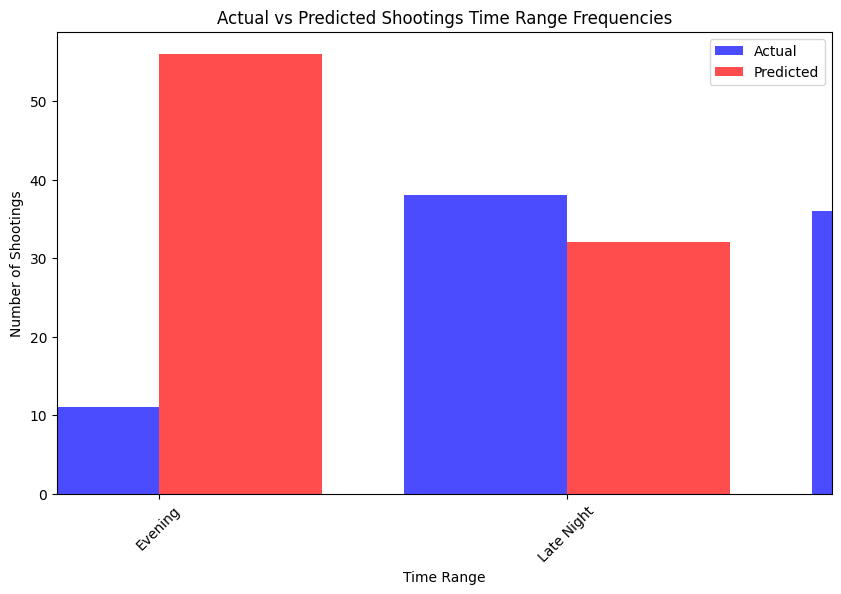

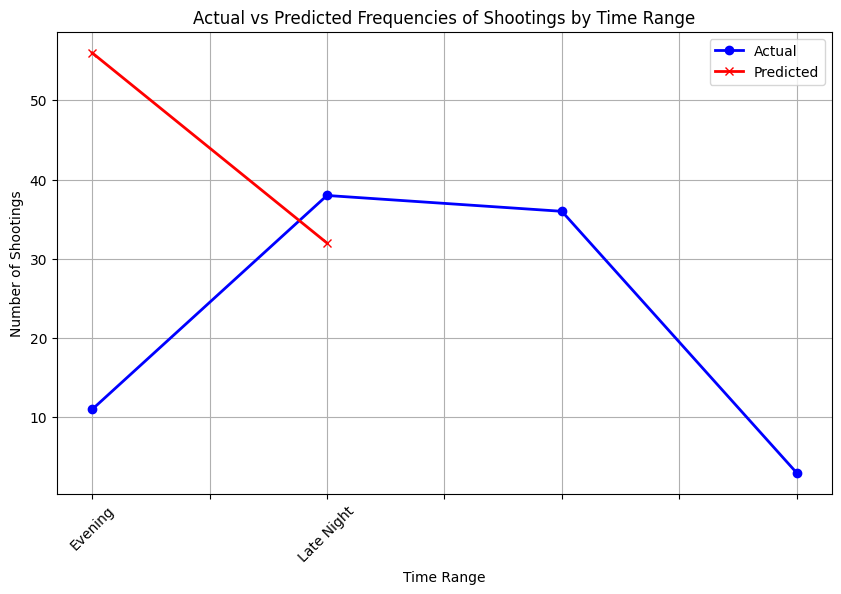

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the data
file_path = r'C:\Users\chari\Documents\Data Tech Analytics\CPD_Reported_Shootings_20241026.csv'
df = pd.read_csv(file_path)

# Combine DateOccurred and TimeOccurred columns into 'DateTimeOccurred'
df['DateTimeOccurred'] = pd.to_datetime(
    df['DateOccurred'].astype(str) + ' ' + df['TimeOccurred'].astype(str),
    errors='coerce'
)
df['HourOccurred'] = df['DateTimeOccurred'].dt.hour

# Handle missing values directly without using inplace=True
df['HourOccurred'] = df['HourOccurred'].fillna(0)
df['SNA_NEIGHBORHOOD'] = df['SNA_NEIGHBORHOOD'].fillna('Unknown')

# Function to create time ranges
def time_range(hour):
    if 0 <= hour < 6:
        return "Late Night"
    elif 6 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 18:
        return "Afternoon"
    else:
        return "Evening"

df['TimeRange'] = df['HourOccurred'].apply(time_range)

# Focus on the top 3 neighborhoods
top_neighborhoods = df['SNA_NEIGHBORHOOD'].value_counts().nlargest(3).index
df_top = df[df['SNA_NEIGHBORHOOD'].isin(top_neighborhoods)]

# One-hot encode the 'SNA_NEIGHBORHOOD' column
X = pd.get_dummies(df_top[['SNA_NEIGHBORHOOD']], drop_first=True)
y = df_top['TimeRange']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# Visualization: Actual vs Predicted Time Ranges (Bar Plot)
actual_counts = y_test.value_counts().sort_index()
predicted_counts = pd.Series(y_pred).value_counts().sort_index()

plt.figure(figsize=(10, 6))
ax = actual_counts.plot(kind='bar', width=0.4, position=1, label='Actual', color='b', alpha=0.7)
predicted_counts.plot(kind='bar', width=0.4, position=0, label='Predicted', color='r', alpha=0.7)
plt.title('Actual vs Predicted Shootings Time Range Frequencies')
plt.xlabel('Time Range')
plt.ylabel('Number of Shootings')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Visualization: Line Plot for Actual vs Predicted Frequencies
plt.figure(figsize=(10, 6))
actual_counts.plot(kind='line', marker='o', color='b', label='Actual', linewidth=2)
predicted_counts.plot(kind='line', marker='x', color='r', label='Predicted', linewidth=2)
plt.title('Actual vs Predicted Frequencies of Shootings by Time Range')
plt.xlabel('Time Range')
plt.ylabel('Number of Shootings')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        88

    accuracy                           1.00        88
   macro avg       1.00      1.00      1.00        88
weighted avg       1.00      1.00      1.00        88



C:\Users\chari\AppData\Local\Temp\ipykernel_25200\552524667.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top.loc[:, 'DayOfWeekName'] = df_top['DayOfWeekOccurred'].map(day_map)


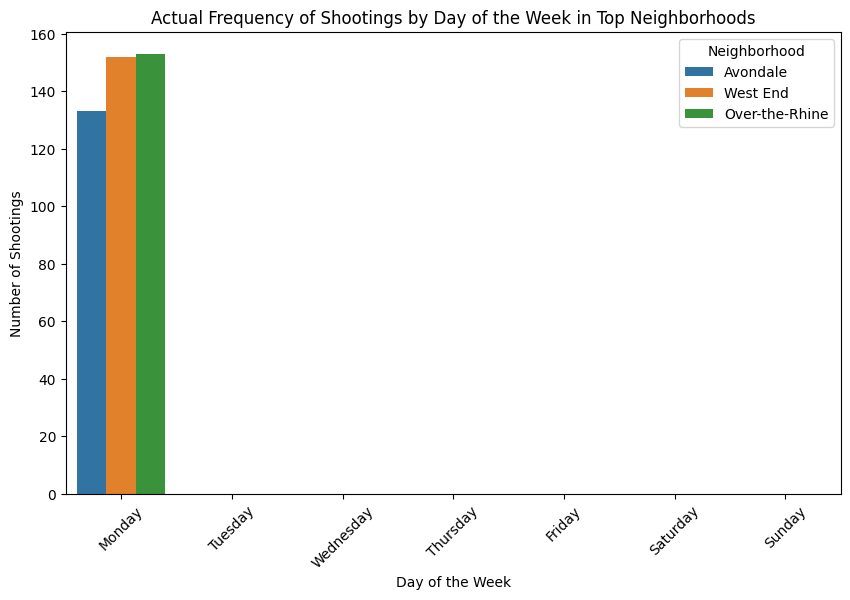

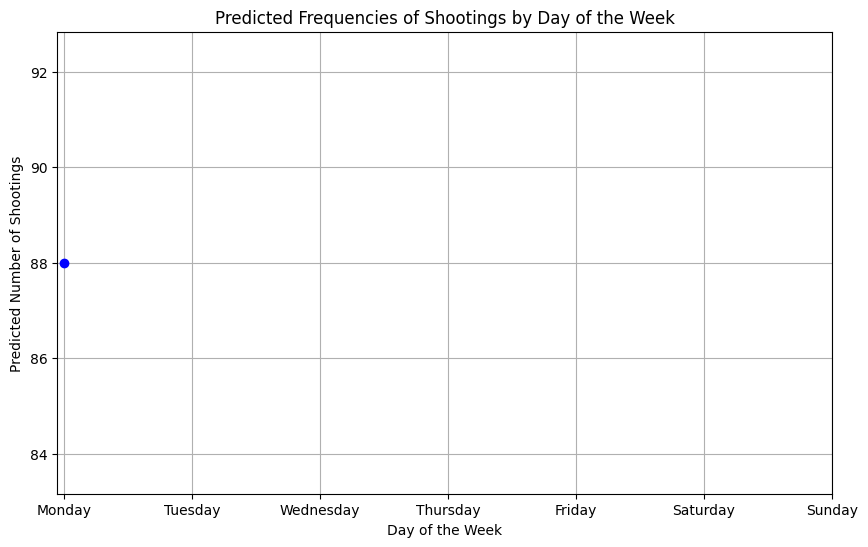

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Step 1: Load the data
file_path = r'C:\Users\chari\Documents\Data Tech Analytics\CPD_Reported_Shootings_20241026.csv'
df = pd.read_csv(file_path)

# Step 2: Preprocess the data
# Combine date and time to create 'DateTimeOccurred'
df['DateTimeOccurred'] = pd.to_datetime(
    df['DateOccurred'].astype(str) + ' ' + df['TimeOccurred'].astype(str),
    format='%Y-%m-%d %H:%M:%S',  # Adjust the format to your data
    errors='coerce'
)

# Extract the Day of the Week from DateTimeOccurred
df['DayOfWeekOccurred'] = df['DateTimeOccurred'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# Handle missing values without using inplace=True
df['DayOfWeekOccurred'] = df['DayOfWeekOccurred'].fillna(0)  # Fill missing day values with Monday (0)
df['SNA_NEIGHBORHOOD'] = df['SNA_NEIGHBORHOOD'].fillna('Unknown')  # Fill missing neighborhood values

# Step 3: Focus on top neighborhoods
top_neighborhoods = df['SNA_NEIGHBORHOOD'].value_counts().nlargest(3).index
df_top = df[df['SNA_NEIGHBORHOOD'].isin(top_neighborhoods)]

# Step 4: Select features and target
X = pd.get_dummies(df_top[['SNA_NEIGHBORHOOD']], drop_first=True)
y = df_top['DayOfWeekOccurred']  # Predicting the Day of the Week

# Step 5: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train a classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = model.predict(X_test)

# Step 8: Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))

# Step 9: Visualize actual shooting data - Bar Plot for Frequency of Shootings by Day of the Week
# Create a mapping for days of the week for readability
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_top.loc[:, 'DayOfWeekName'] = df_top['DayOfWeekOccurred'].map(day_map)

# Bar plot showing the actual shootings frequency by day of the week for top neighborhoods
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top, x='DayOfWeekName', hue='SNA_NEIGHBORHOOD', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Actual Frequency of Shootings by Day of the Week in Top Neighborhoods')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Shootings')
plt.xticks(rotation=45)
plt.legend(title='Neighborhood', loc='upper right')
plt.show()

# Step 10: Visualize predicted shooting data - Line Plot for Predicted Days of the Week

# Create a DataFrame for predicted days of the week
pred_df = pd.DataFrame({'PredictedDay': pd.Series(y_pred)})

# Count the occurrences of each predicted day
pred_counts = pred_df['PredictedDay'].value_counts().sort_index()

# Create a line plot for predicted frequencies (for all days)
plt.figure(figsize=(10, 6))
pred_counts.plot(kind='line', marker='o', linestyle='-', color='b')
plt.title('Predicted Frequencies of Shootings by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Predicted Number of Shootings')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid(True)
plt.show()


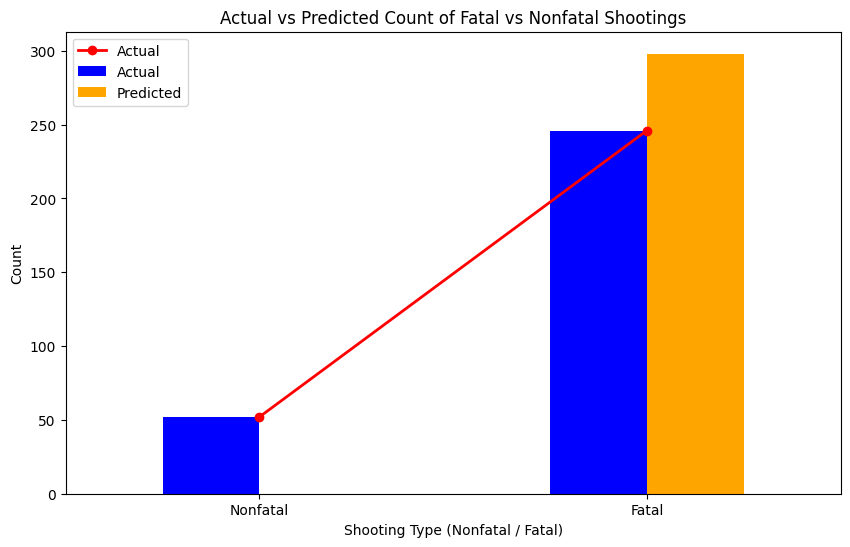

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Load the data from a CSV file
file_path = r'C:\Users\chari\Documents\Data Tech Analytics\CPD_Reported_Shootings_20241026.csv'
df = pd.read_csv(file_path)

# Step 3: Convert categorical columns to numbers using LabelEncoder
# LabelEncoder turns categorical values into numbers, which are easier for machine learning models
label_encoder = LabelEncoder()

df['SNA_NEIGHBORHOOD'] = label_encoder.fit_transform(df['SNA_NEIGHBORHOOD'].fillna('Unknown'))  # Fill missing with 'Unknown' to handle NaN
df['Type'] = label_encoder.fit_transform(df['Type'].fillna('Unknown'))  # Type represents whether shooting is fatal or nonfatal
df['Age'] = label_encoder.fit_transform(df['Age'].fillna('Unknown'))  # Age might be missing too

# Step 4: Define the features (X) and the target (y)
# We're using SNA_NEIGHBORHOOD, Age, and other features to predict the Type of shooting (fatal/nonfatal)
X = df[['SNA_NEIGHBORHOOD', 'Age']]  # Using Neighborhood and Age as features
y = df['Type']  # 'Type' will be our target variable (0 for nonfatal, 1 for fatal)

# Step 5: Handle missing values for features
# If there are missing values in the features, we'll fill them with the average of each column
X = X.fillna(X.mean())

# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train a simple Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 8: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 9: Compare actual vs predicted values in a bar plot
# We will create a bar plot comparing the actual and predicted counts of fatal vs. nonfatal shootings
actual_counts = y_test.value_counts()  # Count how many times each type appears in the actual data
predicted_counts = pd.Series(y_pred).value_counts()  # Count how many times each type was predicted

# Make a DataFrame to store this comparison
comparison_df = pd.DataFrame({
    'Actual': actual_counts,
    'Predicted': predicted_counts
}).sort_index()  # Sort by the index to make it easier to compare

# Plotting the bar chart with comparison data
comparison_df.plot(kind='bar', figsize=(10, 6), color=['blue', 'orange'])

# Step 10: Adjust the x-ticks to show the actual labels (0 = Nonfatal, 1 = Fatal)
xticks_labels = ['Nonfatal', 'Fatal']  # Since we are predicting fatal or nonfatal

# Add a line plot to show the actual values
plt.plot(comparison_df.index, comparison_df['Actual'], color='red', marker='o', label='Actual', linestyle='-', linewidth=2)

# Add labels and title to the plot
plt.title('Actual vs Predicted Count of Fatal vs Nonfatal Shootings')
plt.xlabel('Shooting Type (Nonfatal / Fatal)')
plt.ylabel('Count')
plt.xticks(ticks=comparison_df.index, labels=xticks_labels, rotation=0)  # Show actual labels on x-axis
plt.legend()  # Show the legend for the line plot

plt.show()  # Finally, show the plot


## Final Visualizations

Loaded 1000 records from API


<Figure size 1200x800 with 0 Axes>

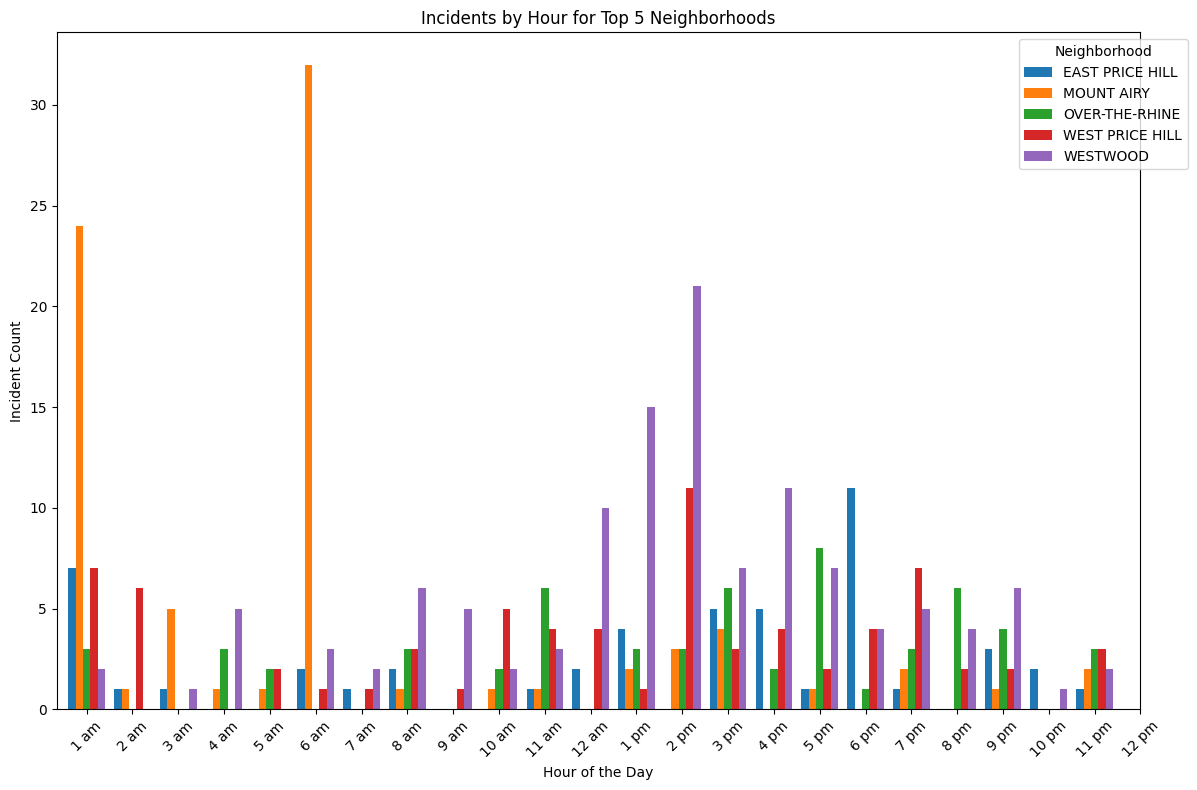

In [123]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

# API URL to get crime data
api_url = 'https://data.cincinnati-oh.gov/resource/k59e-2pvf.json'

# Make a request to the API
response = requests.get(api_url)

# If the request was successful
if response.status_code == 200:
    # Convert the data into a DataFrame
    data = pd.DataFrame(response.json())
    print(f"Loaded {len(data)} records from API")

    # Check if 'date_reported' exists and convert it to datetime format
    if 'date_reported' in data.columns:
        data['date_reported'] = pd.to_datetime(data['date_reported'], errors='coerce')
        data['incident_hour'] = data['date_reported'].dt.hour

        # Get top 5 neighborhoods with the most incidents
        top_neigh = data['cpd_neighborhood'].value_counts().head(5).index
        filtered_data = data[data['cpd_neighborhood'].isin(top_neigh)]

        # Group incidents by hour and neighborhood
        hourly_incidents = filtered_data.groupby(['incident_hour', 'cpd_neighborhood']).size().unstack(fill_value=0)

        # Create a bar chart
        plt.figure(figsize=(12, 8))  # Set the figure size
        hourly_incidents.plot(kind='bar', stacked=False, width=0.8, figsize=(12, 8))

        plt.title('Incidents by Hour for Top 5 Neighborhoods')  # Chart title
        plt.xlabel('Hour of the Day')  # X-axis label
        plt.ylabel('Incident Count')  # Y-axis label

        # Adjust x-ticks to show time in am/pm
        plt.xticks(range(24), [f"{(i % 12) + 1} {'am' if i < 12 else 'pm'}" for i in range(24)], rotation=45)

        plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1))
        plt.tight_layout()  # Adjust the layout to fit the chart
        plt.show()  # Show the chart
    else:
        print("'date_reported' column is missing in the data")
else:
    print(f"API request failed with status: {response.status_code}")


C:\Users\chari\AppData\Local\Temp\ipykernel_25200\1747833522.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateTimeOccurred'] = pd.to_datetime(df['DateOccurred'].astype(str) + ' ' + df['TimeOccurred'].astype(str), errors='coerce')
C:\Users\chari\AppData\Local\Temp\ipykernel_25200\1747833522.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DayOfWeek', data=df, palette='magma', order=days_order)


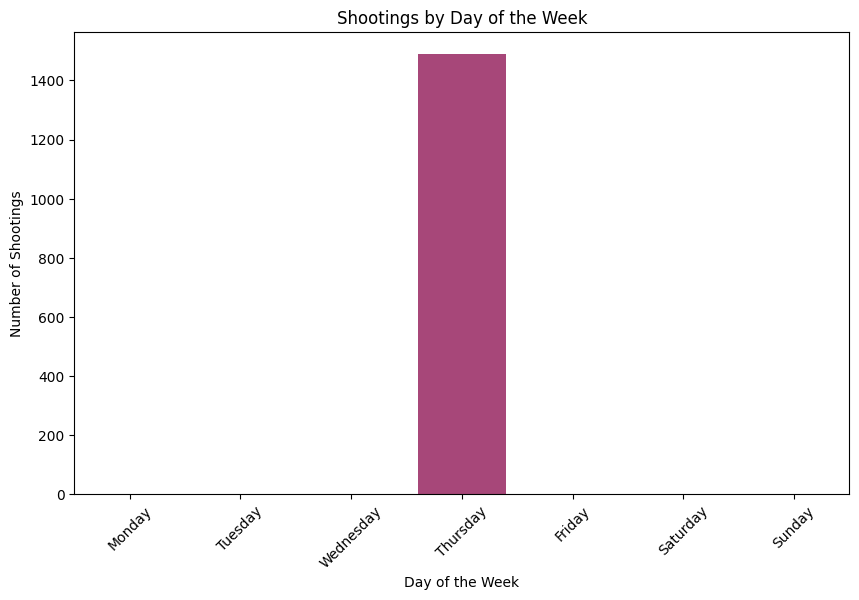

C:\Users\chari\AppData\Local\Temp\ipykernel_25200\1747833522.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type', data=df, palette='Blues')


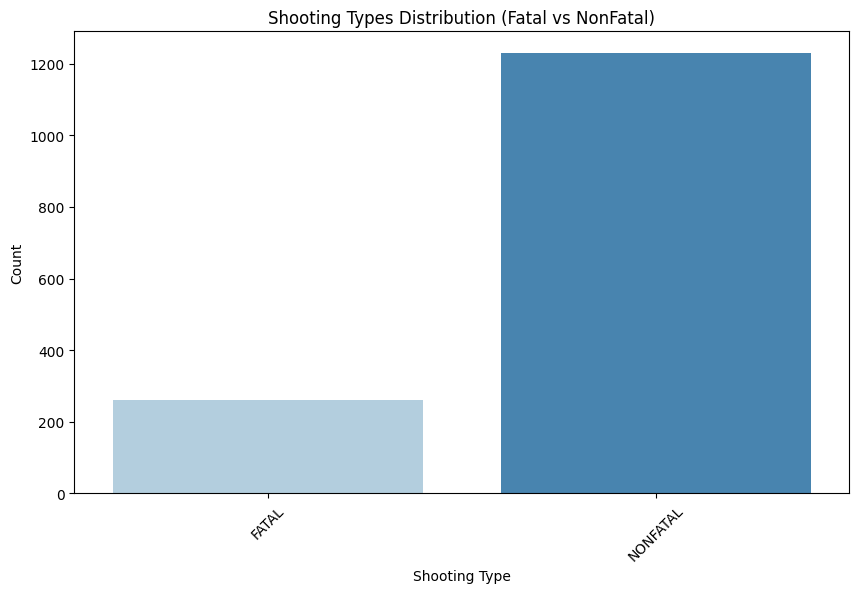

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the data from the CSV file
file_path = r'C:\Users\chari\Documents\Data Tech Analytics\CPD_Reported_Shootings_20241026.csv'
df = pd.read_csv(file_path)

# Step 3: Combine Date and Time columns into one DateTime column
df['DateOccurred'] = pd.to_datetime(df['DateOccurred'], errors='coerce')
df['TimeOccurred'] = pd.to_datetime(df['TimeOccurred'], errors='coerce').dt.time

# Combine Date and Time into a single DateTime column
df['DateTimeOccurred'] = pd.to_datetime(df['DateOccurred'].astype(str) + ' ' + df['TimeOccurred'].astype(str), errors='coerce')

# Step 4: Add a new column for the day of the week
df['DayOfWeek'] = df['DateTimeOccurred'].dt.day_name()

# Define the correct order for days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Step 5: Plot the number of shootings by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(x='DayOfWeek', data=df, palette='magma', order=days_order)
plt.title('Shootings by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Shootings')
plt.xticks(rotation=45)
plt.show()

# Step 6: Plot the distribution of shooting types (fatal vs nonfatal)
plt.figure(figsize=(10, 6))
sns.countplot(x='Type', data=df, palette='Blues')
plt.title('Shooting Types Distribution (Fatal vs NonFatal)')
plt.xlabel('Shooting Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


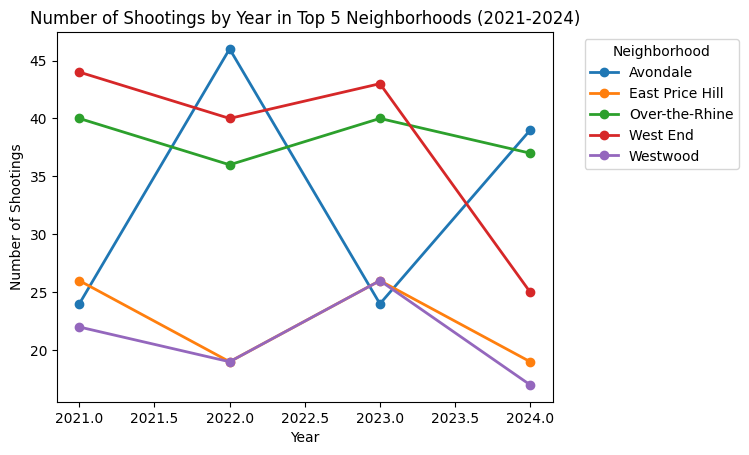

In [141]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = r'C:\Users\chari\Documents\Data Tech Analytics\CPD_Reported_Shootings_20241026.csv'
df = pd.read_csv(file_path)

# Convert 'DateOccurred' to datetime format
df['DateOccurred'] = pd.to_datetime(df['DateOccurred'].astype(str), format='%Y%m%d', errors='coerce')

# Remove rows with missing dates
df = df.dropna(subset=['DateOccurred'])

# Filter data from 2021 to 2024
df = df[(df['DateOccurred'] >= '2021-01-01') & (df['DateOccurred'] <= '2024-12-31')]

# Add 'YearOccurred' column
df['YearOccurred'] = df['DateOccurred'].dt.year

# Get top 5 neighborhoods with the most shootings
top_neighborhoods = df['SNA_NEIGHBORHOOD'].value_counts().head(5).index

# Filter data for these neighborhoods
df_top_neighborhoods = df[df['SNA_NEIGHBORHOOD'].isin(top_neighborhoods)]

# Count shootings by year and neighborhood
shooting_trends = df_top_neighborhoods.groupby(['YearOccurred', 'SNA_NEIGHBORHOOD']).size().unstack(fill_value=0)

# Plot the trends
shooting_trends.plot(kind='line', marker='o', linewidth=2)
plt.title('Number of Shootings by Year in Top 5 Neighborhoods (2021-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Shootings')
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Resources and References
*What resources and references have you used for this project?*
📝 I have the 2 datasets the City of Cincinnati and 1 API from them as well. I might add more later on since I know there will be need for further research.

In [44]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 35228 bytes to source.py
